In [ ]:
# !pip install miditime

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from miditime.miditime import MIDITime


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:


data = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log.csv')

#weights are based on table 4 in https://www.mdpi.com/2076-3417/12/21/10951
emotions = ["anger","sadness","happiness","fear","neutral"]
random.seed(42)
new_column=random.choices(emotions, weights=(177,30,38,30,312), k=len(data))

#add column
data['Emotion']=new_column

In [ ]:
# data.to_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/Call_log_with_Emotions.csv', index=False)

In [3]:
user_exp = pd.read_csv('c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/Call_Center_Final/Call_Center_Final/User_experience.csv')
user_exp

Agent_ID            Call_Date User_Experience
0       32430  2017-01-25 00:00:00       very good
1       26020  2017-01-26 00:00:00       very good
2       26010  2017-01-27 00:00:00       very good
3       26020  2017-01-27 00:00:00       very good
4       32040  2017-01-27 00:00:00       very good
..        ...                  ...             ...
495     32350  2017-12-09 00:00:00       very good
496     32410  2017-12-09 00:00:00       very good
497     32380  2017-12-10 00:00:00       excellent
498     32430  2017-12-10 00:00:00       very good
499     14210  2017-12-11 00:00:00       very good

[500 rows x 3 columns]

In [4]:
merged_df = data.merge(user_exp, on=['Agent_ID', 'Call_Date'], how='right')

In [5]:
merged_df

Agent_ID            Call_Date  Talk_Time  After_Call_Work_Time  \
0        32430  2017-01-25 00:00:00       1990                   629   
1        32430  2017-01-25 00:00:00       2586                   530   
2        32430  2017-01-25 00:00:00       1388                   264   
3        32430  2017-01-25 00:00:00       1024                   272   
4        32430  2017-01-25 00:00:00       1496                   306   
...        ...                  ...        ...                   ...   
9245     14210  2017-12-11 00:00:00       2816                   661   
9246     14210  2017-12-11 00:00:00        846                   329   
9247     14210  2017-12-11 00:00:00        451                   106   
9248     14210  2017-12-11 00:00:00       2239                   458   
9249     14210  2017-12-11 00:00:00       2429                   726   

      Queue_Time Call_resolution_ID Call_Type_ID Plan_ID  Emotion  \
0             18        Resolution1       Type20   Plan3  neutral   
1             12        Resolution1       Type40   Plan1    anger   
2              7        Resolution1       Type40   Plan6  sadness   
3             13        Resolution2       Type10   Plan5  neutral   
4              9        Resolution1       Type30   Plan6    anger   
...          ...                ...          ...     ...      ...   
9245          13        Resolution1       Type40   Plan2     fear   
9246          13        Resolution1       Type50   Plan4  neutral   
9247          10        Resolution1       Type40   Plan5    anger   
9248          14        Resolution1       Type40   Plan4    anger   
9249          11        Resolution1       Type40   Plan2  neutral   

     User_Experience  
0          very good  
1          very good  
2          very good  
3          very good  
4          very good  
...              ...  
9245       very good  
9246       very good  
9247       very good  
9248       very good  
9249       very good  

[9250 rows x 10 columns]

## Data Visualization

For the entire Dataset

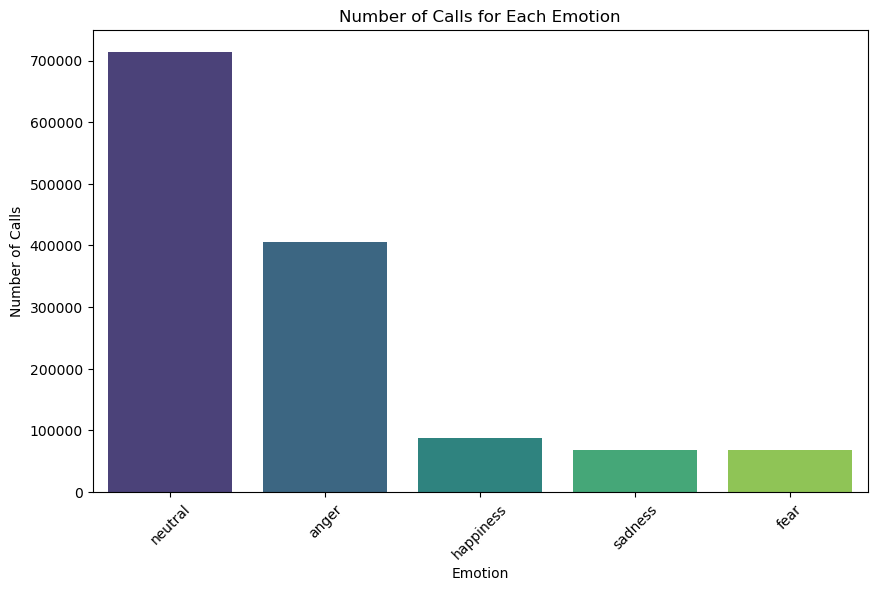

In [22]:
emotion_counts = data['Emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Calls that were rated

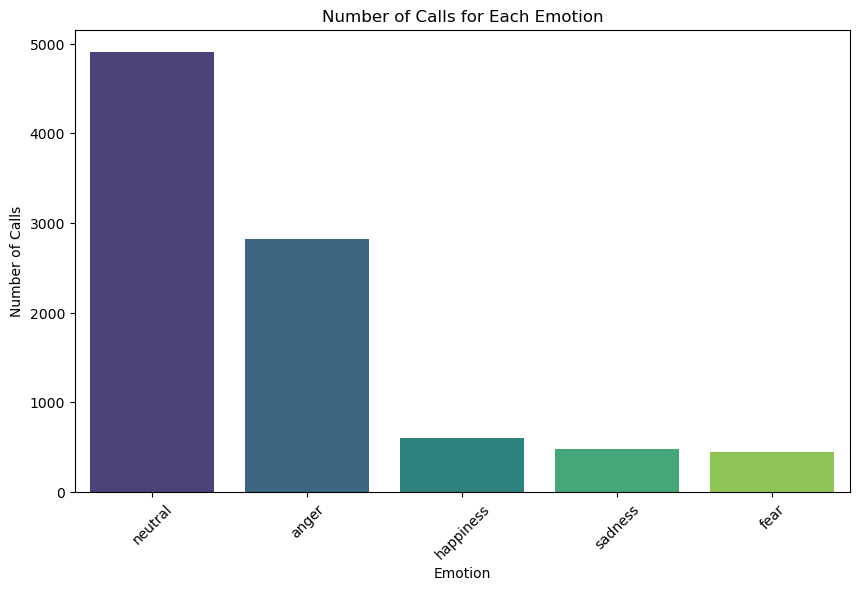

In [23]:
emotion_counts = merged_df['Emotion'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Including the User Experience

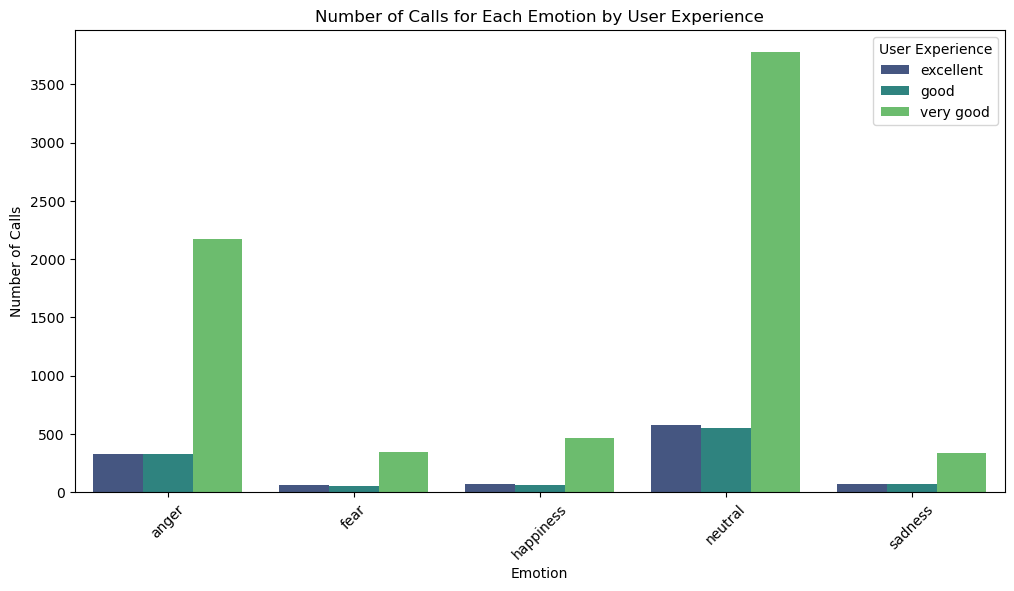

In [24]:
emotion_user_counts =merged_df.groupby(['Emotion', 'User_Experience']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Count', hue='User_Experience', data=emotion_user_counts, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Number of Calls')
plt.title('Number of Calls for Each Emotion by User Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='User Experience')
plt.show()

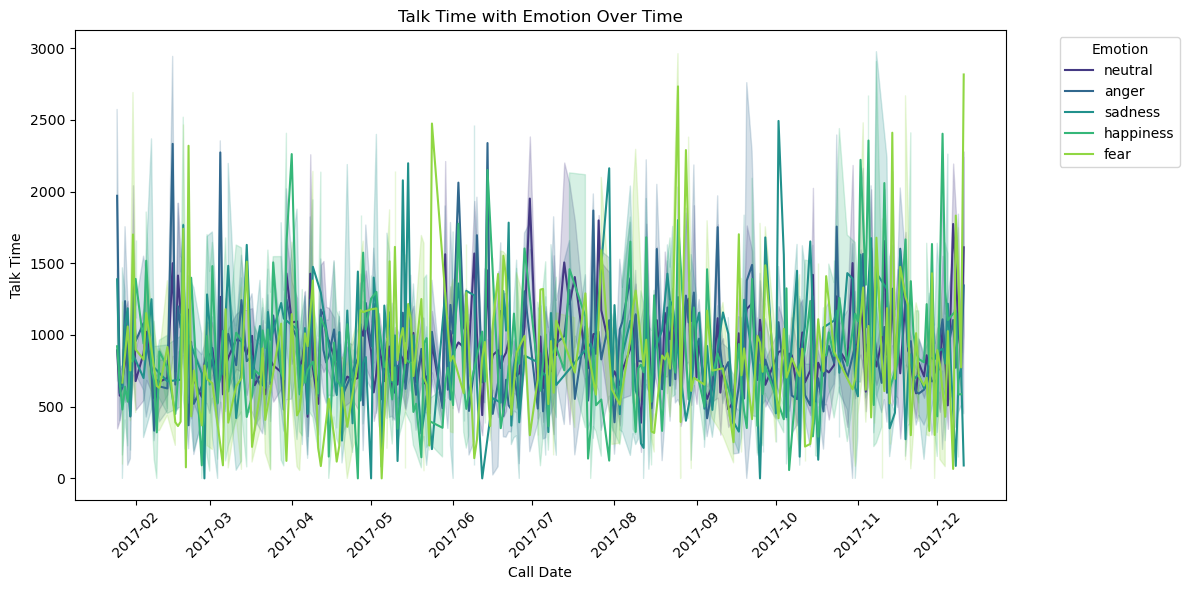

In [27]:
merged_df['Call_Date'] = pd.to_datetime(merged_df['Call_Date'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Call_Date', y='Talk_Time', hue='Emotion', palette='viridis')
plt.xlabel('Call Date')
plt.ylabel('Talk Time')
plt.title('Talk Time with Emotion Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

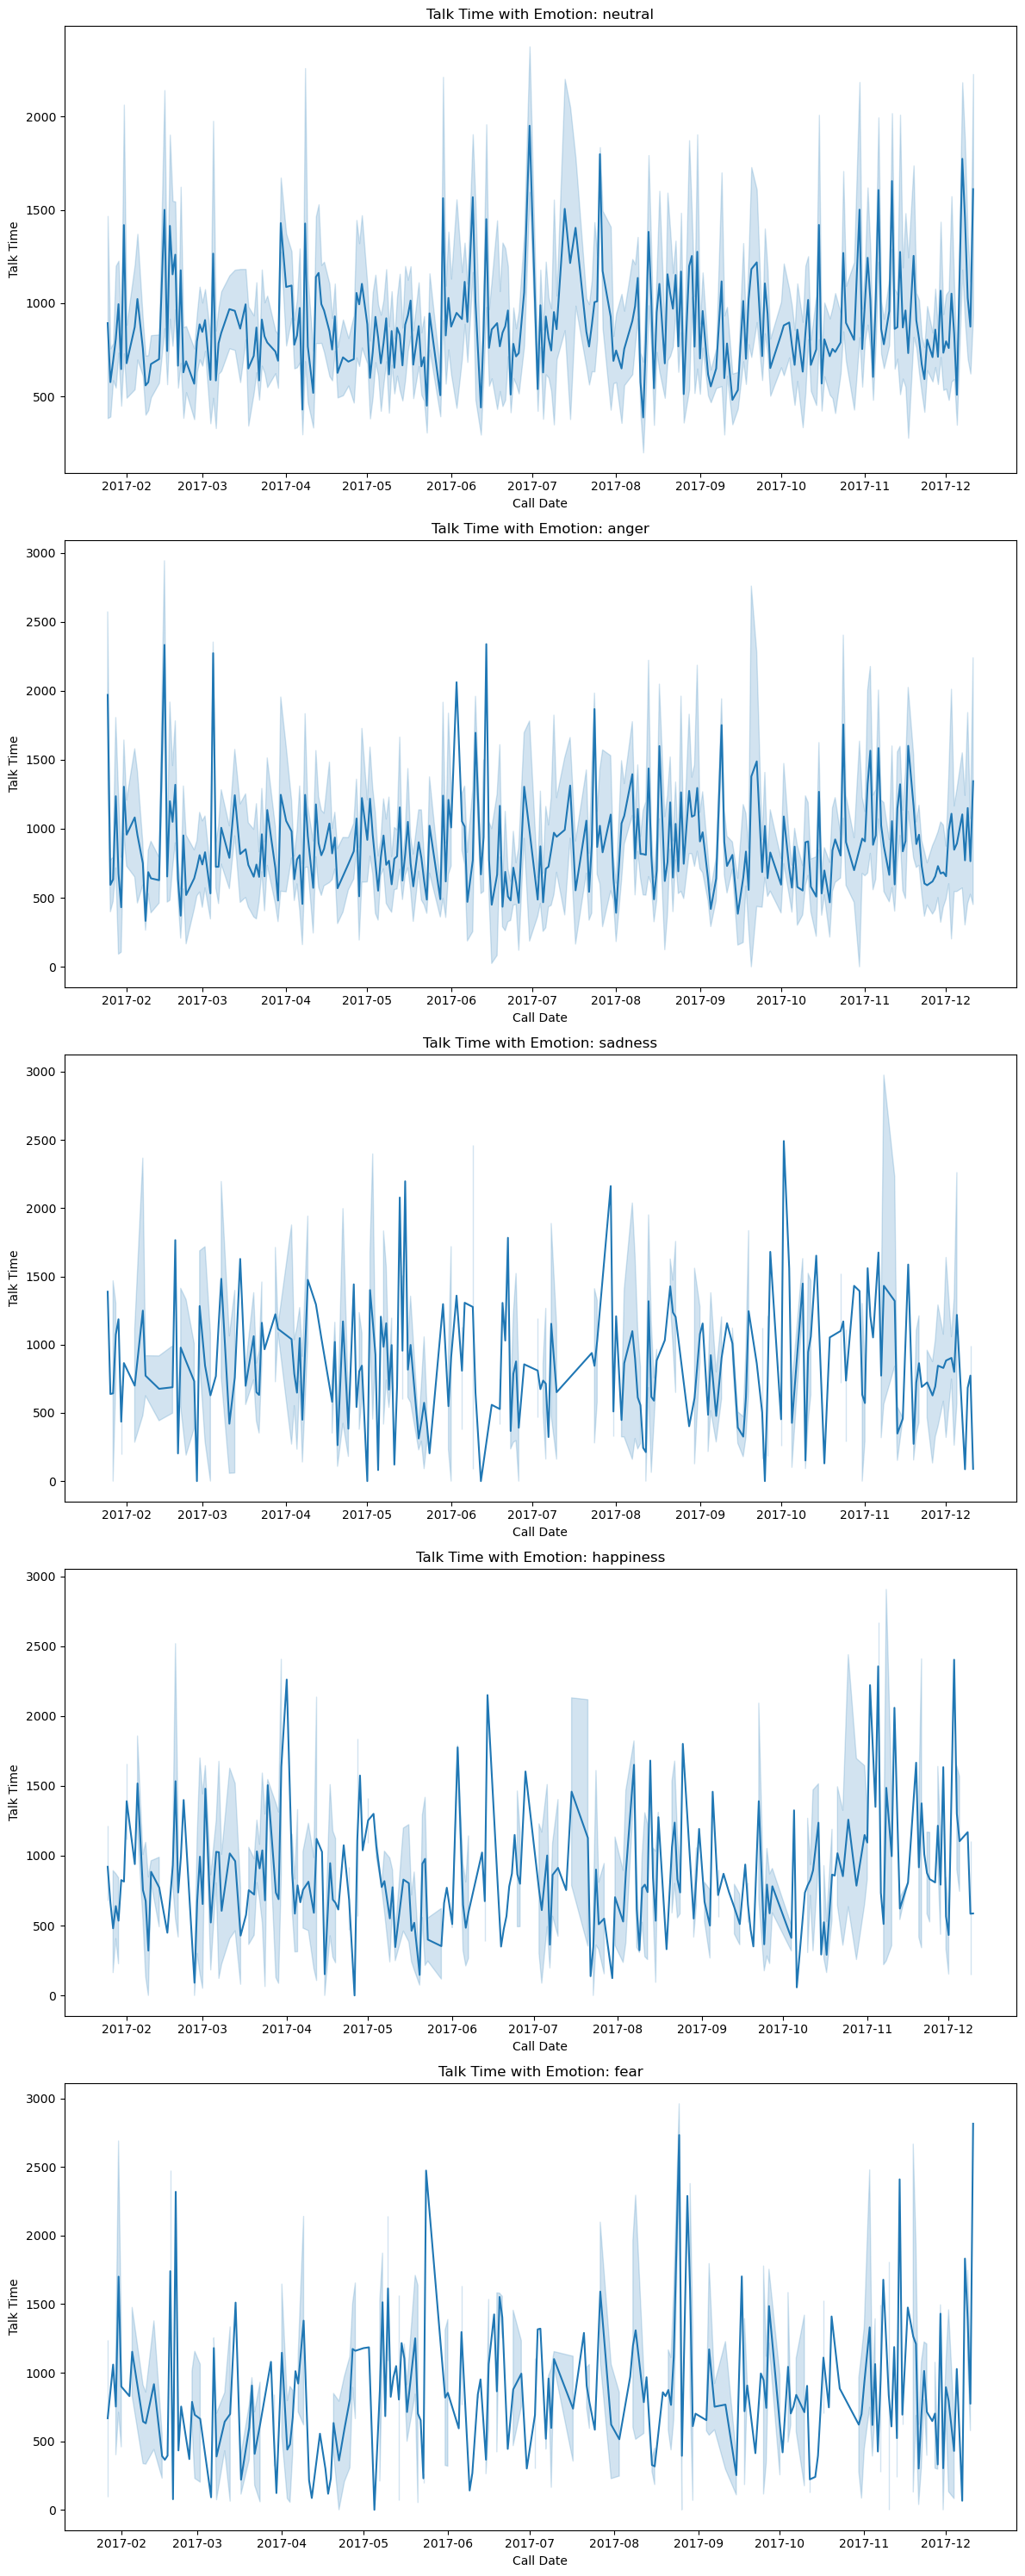

In [30]:
# Get unique emotions in the DataFrame
unique_emotions = merged_df['Emotion'].unique()

# Create subplots for each emotion
fig, axes = plt.subplots(nrows=len(unique_emotions), figsize=(12, 6 * len(unique_emotions)))

# Loop through each emotion and create a separate subplot
for i, emotion in enumerate(unique_emotions):
    ax = axes[i]
    
    # Filter the DataFrame for the current emotion
    subset_df = merged_df[merged_df['Emotion'] == emotion]
    
    # Create a line plot for 'Talk_Time' with the current emotion
    sns.lineplot(data=subset_df, x='Call_Date', y='Talk_Time', ax=ax)
    
    # Set the title and labels for the subplot
    ax.set_title(f'Talk Time with Emotion: {emotion}')
    ax.set_xlabel('Call Date')
    ax.set_ylabel('Talk Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

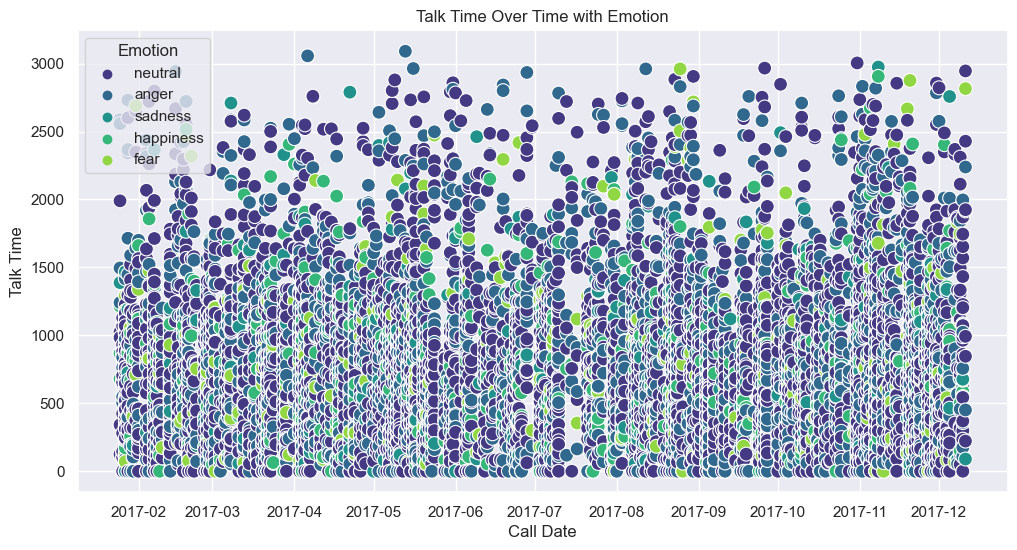

In [32]:
# Set the style for the plot
sns.set(style="darkgrid")

# Create a scatter plot with colors based on 'Emotion'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='Call_Date', y='Talk_Time', hue='Emotion', palette='viridis', s=100)

# Set labels and title
plt.xlabel('Call Date')
plt.ylabel('Talk Time')
plt.title('Talk Time Over Time with Emotion')

# Display a legend
plt.legend(title='Emotion', loc='upper left')

# Show the plot
plt.show()

# Data Sonification

## Example

In [ ]:
data=pd.read_csv('c:/Users/gusta/Downloads/archive/raw_sales.csv',parse_dates=['datesold'])
data.size

In [ ]:
data

In [ ]:
my_data = data[['datesold','price']].to_dict(orient='records')

In [ ]:
my_data

In [ ]:
my_data_epoched = [{'days_since_epoch': mymidi.days_since_epoch(d['datesold']), 'price': (d['price'])} for d in my_data]

In [ ]:
my_data_epoched

In [ ]:
my_data_timed = [{'beat': mymidi.beat(d['days_since_epoch']), 'price': d['price']} for d in my_data_epoched]

In [ ]:
my_data_timed

In [ ]:
start_time = my_data_timed[0]['beat']

In [ ]:
def mag_to_pitch_tuned(magnitude):
    """Where does this data point sit in the domain of your data? 
    (I.E. the min magnitude is 3, the max in 5.6). 
    In this case the optional 'True' means the scale is reversed, 
    so the highest value will return the lowest percentage."""

#     scale_pct = mymidi.linear_scale_pct(3, 5.7, magnitude)

    # Another option: Linear scale, reverse order
    scale_pct = mymidi.linear_scale_pct(400000,8100000 , magnitude)

    # Another option: Logarithmic scale, reverse order
#     scale_pct = mymidi.log_scale_pct(3, 5.7, magnitude, True)

    # Pick a range of notes. This allows you to play in a key.
    c_major = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
    c_minor = ['C', 'D', 'D#', 'F', 'G', 'G#', 'A#']

    #Find the note that matches your data point
    note = mymidi.scale_to_note(scale_pct, c_major)

    #Translate that note to a MIDI pitch
    midi_pitch = mymidi.note_to_midi_pitch(note)

    return midi_pitch

In [ ]:
note_list = []

for d in my_data_timed:
    note_list.append([
        d['beat'] - start_time,
        mag_to_pitch_tuned(d['price']),
        100,  # velocity
        1  # duration, in beats
    ])

In [ ]:
note_list

In [ ]:
# Add a track with those notes
mymidi.add_track(note_list)

# Output the .mid file
mymidi.save_midi()

## First Approach

In [ ]:
merged_df.head()

In [6]:
emotion_lists = {
    'neutral': [60, 55, 60, 67, 72, 67, 60, 55],
    'happiness': [60, 64, 67, 72, 72, 67, 64, 60],
    'sadness': [60, 63, 67, 72, 72, 67, 63, 60],
    'fear': [60, 63, 66, 72, 72, 66, 63, 60],
    'anger':  [60, 64, 68, 72, 72, 68, 64, 60] 
}

In [7]:
def generate_emotion_list(row):
    emotion = row['Emotion']
    talk_time = int(row['Talk_Time'] / 100)
    emotion_list = emotion_lists.get(emotion, [])
    return [emotion_list[i % len(emotion_list)] for i in range(talk_time)]

In [8]:
merged_df['Emotion_List'] = merged_df.apply(generate_emotion_list, axis=1)

In [9]:
merged_df['Emotion_List']

0       [60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 6...
1       [60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 7...
2       [60, 63, 67, 72, 72, 67, 63, 60, 60, 63, 67, 7...
3                [60, 55, 60, 67, 72, 67, 60, 55, 60, 55]
4       [60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 7...
                              ...                        
9245    [60, 63, 66, 72, 72, 66, 63, 60, 60, 63, 66, 7...
9246                     [60, 55, 60, 67, 72, 67, 60, 55]
9247                                     [60, 64, 68, 72]
9248    [60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 7...
9249    [60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 6...
Name: Emotion_List, Length: 9250, dtype: object

In [10]:
all_emotion_values = merged_df['Emotion_List'].explode().tolist()

In [11]:
all_emotion_values

[60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 60,
 63,
 67,
 72,
 72,
 67,
 63,
 60,
 60,
 63,
 67,
 72,
 72,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 60,
 64,
 67,
 72,
 72,
 67,
 60,
 64,
 67,
 72,
 72,
 67,
 64,
 60,
 60,
 64,
 67,
 72,
 60,
 55,
 60,
 60,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 60,
 64,
 67,
 72,
 72,
 67,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 64,
 68,
 72,
 72,
 68,
 64,
 60,
 60,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 67,
 72,
 67,
 60,
 55,
 60,
 55,
 60,
 63,
 67,
 72,
 72,
 67,
 60,
 64,
 67,
 72,
 72,
 67,
 60,
 64,
 68,


In [12]:
import math

nan_indices = [i for i, x in enumerate(all_emotion_values) if math.isnan(x)]

# Using a loop
nan_indices = []
for i, x in enumerate(all_emotion_values):
    if math.isnan(x):
        nan_indices.append(i)

print("Indices of NaN values:", nan_indices)

Indices of NaN values: [256, 280, 296, 421, 447, 490, 601, 602, 712, 986, 1199, 1246, 1247, 1320, 1635, 1872, 1988, 1989, 2272, 2356, 2401, 2488, 2526, 2532, 2764, 2799, 2993, 3035, 3050, 3074, 3213, 3331, 3540, 3603, 3775, 3870, 4394, 4444, 4492, 4912, 4924, 5473, 5488, 5799, 5800, 5849, 5909, 6043, 6286, 6348, 6371, 6424, 6497, 6572, 6573, 6583, 6681, 6749, 6782, 7109, 7201, 7288, 7323, 7498, 7981, 8017, 8033, 8090, 8118, 8126, 8208, 8437, 8503, 8801, 8937, 8948, 8956, 9109, 9311, 9341, 9608, 9655, 9680, 9990, 10119, 10244, 10351, 10420, 10860, 10915, 10989, 11044, 11115, 11197, 11214, 11215, 11248, 11478, 11479, 11503, 11580, 11705, 11722, 11833, 11848, 11895, 11986, 12110, 12315, 12408, 12597, 12629, 12845, 12911, 12958, 13228, 13292, 13359, 13414, 13484, 14385, 14455, 14689, 14764, 14834, 14882, 14912, 14913, 14916, 15214, 15287, 15662, 15945, 16153, 16169, 16306, 16318, 16321, 16381, 16403, 17001, 17137, 17429, 17502, 17689, 18018, 18067, 18109, 18133, 18141, 18170, 18171, 18201,

In [13]:
cleaned_list = [x for x in all_emotion_values if not math.isnan(x)]

print("Cleaned list without NaN values:", cleaned_list)

Cleaned list without NaN values: [60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 60, 63, 67, 72, 72, 67, 63, 60, 60, 63, 67, 72, 72, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 60, 64, 67, 72, 72, 67, 60, 64, 67, 72, 72, 67, 64, 60, 60, 64, 67, 72, 60, 55, 60, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 60, 64, 67, 72, 72, 67, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 64, 68, 72, 72, 68, 64, 60, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 63, 67, 72, 72, 67, 60, 64, 67, 72, 72, 67, 60, 64, 68, 72, 72, 68, 60, 64, 68, 72, 72, 68, 64, 60, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 55, 60, 60, 55, 60, 67, 72, 67, 60, 55, 60, 64, 68, 72, 72, 68, 64, 60, 60, 55, 60

In [14]:
custom_list = [[i/5, val, 127, 1] for i, val in enumerate(cleaned_list)]

In [15]:
len(custom_list)

72837

In [16]:
custom_list[0][0] = 0 

In [39]:
my_list = custom_list[:10000]

In [16]:
my_list

[[0, 60, 127, 1],
 [0.2, 55, 127, 1],
 [0.4, 60, 127, 1],
 [0.6, 67, 127, 1],
 [0.8, 72, 127, 1],
 [1.0, 67, 127, 1],
 [1.2, 60, 127, 1],
 [1.4, 55, 127, 1],
 [1.6, 60, 127, 1],
 [1.8, 55, 127, 1],
 [2.0, 60, 127, 1],
 [2.2, 67, 127, 1],
 [2.4, 72, 127, 1],
 [2.6, 67, 127, 1],
 [2.8, 60, 127, 1],
 [3.0, 55, 127, 1],
 [3.2, 60, 127, 1],
 [3.4, 55, 127, 1],
 [3.6, 60, 127, 1],
 [3.8, 60, 127, 1],
 [4.0, 64, 127, 1],
 [4.2, 68, 127, 1],
 [4.4, 72, 127, 1],
 [4.6, 72, 127, 1],
 [4.8, 68, 127, 1],
 [5.0, 64, 127, 1],
 [5.2, 60, 127, 1],
 [5.4, 60, 127, 1],
 [5.6, 64, 127, 1],
 [5.8, 68, 127, 1],
 [6.0, 72, 127, 1],
 [6.2, 72, 127, 1],
 [6.4, 68, 127, 1],
 [6.6, 64, 127, 1],
 [6.8, 60, 127, 1],
 [7.0, 60, 127, 1],
 [7.2, 64, 127, 1],
 [7.4, 68, 127, 1],
 [7.6, 72, 127, 1],
 [7.8, 72, 127, 1],
 [8.0, 68, 127, 1],
 [8.2, 64, 127, 1],
 [8.4, 60, 127, 1],
 [8.6, 60, 127, 1],
 [8.8, 60, 127, 1],
 [9.0, 63, 127, 1],
 [9.2, 67, 127, 1],
 [9.4, 72, 127, 1],
 [9.6, 72, 127, 1],
 [9.8, 67, 127, 1],
 [

In [32]:
my_list[-4]

[59.2, nan, 127, 1]

In [17]:
mymidi = MIDITime(90, 'c:/Users/gusta/Documents/Data Science Bootcamp/Data Science/Final Project/Data/myfile.mid')

In [18]:
# Add a track with those notes
mymidi.add_track(custom_list)

# Output the .mid file
mymidi.save_midi()

60 0 1 127
55 0.2 1 127
60 0.4 1 127
67 0.6 1 127
72 0.8 1 127
67 1.0 1 127
60 1.2 1 127
55 1.4 1 127
60 1.6 1 127
55 1.8 1 127
60 2.0 1 127
67 2.2 1 127
72 2.4 1 127
67 2.6 1 127
60 2.8 1 127
55 3.0 1 127
60 3.2 1 127
55 3.4 1 127
60 3.6 1 127
60 3.8 1 127
64 4.0 1 127
68 4.2 1 127
72 4.4 1 127
72 4.6 1 127
68 4.8 1 127
64 5.0 1 127
60 5.2 1 127
60 5.4 1 127
64 5.6 1 127
68 5.8 1 127
72 6.0 1 127
72 6.2 1 127
68 6.4 1 127
64 6.6 1 127
60 6.8 1 127
60 7.0 1 127
64 7.2 1 127
68 7.4 1 127
72 7.6 1 127
72 7.8 1 127
68 8.0 1 127
64 8.2 1 127
60 8.4 1 127
60 8.6 1 127
60 8.8 1 127
63 9.0 1 127
67 9.2 1 127
72 9.4 1 127
72 9.6 1 127
67 9.8 1 127
63 10.0 1 127
60 10.2 1 127
60 10.4 1 127
63 10.6 1 127
67 10.8 1 127
72 11.0 1 127
72 11.2 1 127
60 11.4 1 127
55 11.6 1 127
60 11.8 1 127
67 12.0 1 127
72 12.2 1 127
67 12.4 1 127
60 12.6 1 127
55 12.8 1 127
60 13.0 1 127
55 13.2 1 127
60 13.4 1 127
64 13.6 1 127
68 13.8 1 127
72 14.0 1 127
72 14.2 1 127
68 14.4 1 127
64 14.6 1 127
60 14.8 1 127
60

## Second Approach

In [ ]:
merged_df

In [ ]:
emotion_lists_2 = {
    'neutral': [60, 65],
    'happiness': [60, 64],
    'sadness': [60, 63],
    'fear': [60, 61],
    'anger':  [60, 64, 68, 72, 72, 68, 64, 60] 
}

In [ ]:
def generate_emotion_list(row):
    emotion = row['Emotion']
    talk_time = row['Talk_Time']/100
    emotion_list_2 = emotion_lists_2.get(emotion, [])
    return [emotion_list[i % len(emotion_list)] for i in range(talk_time)]